In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Salary.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


<Axes: >

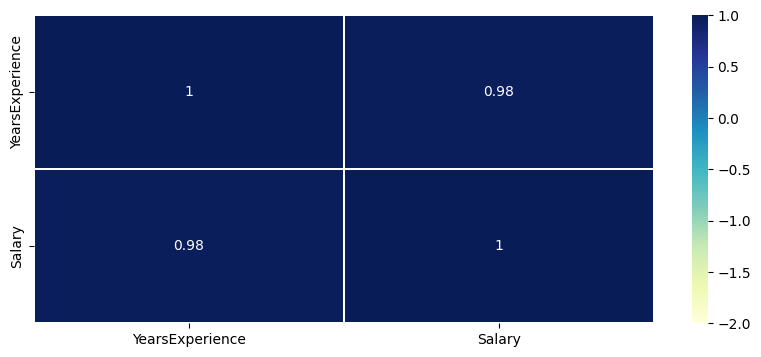

In [5]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

In [6]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
y=data['Salary']
x=data.drop(['Salary'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [9]:
x_test

,YearsExperience
26,9.5
13,4.1
24,8.7
21,7.1
15,4.9
29,10.5
19,6.0
12,4.0
8,3.2


In [10]:
y_test

26    116969
13     57081
24    109431
21     98273
15     67938
29    121872
19     93940
12     56957
8      64445
Name: Salary, dtype: int64

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=0)
model=rf.fit(x_train,y_train)
pickle.dump(rf,open('model.pkl','wb'))

In [12]:
predictions=rf.predict(x_test)
predictions

array([111741.79,  58091.12, 106886.68,  94665.02,  66763.12, 122820.62,
        81979.21,  58091.12,  55906.54])

In [13]:
print(y_test)

26    116969
13     57081
24    109431
21     98273
15     67938
29    121872
19     93940
12     56957
8      64445
Name: Salary, dtype: int64


In [14]:
print(predictions)

[111741.79  58091.12 106886.68  94665.02  66763.12 122820.62  81979.21
  58091.12  55906.54]


In [15]:
from sklearn.metrics import mean_squared_error
print('MSC is :',mean_squared_error(y_test,predictions))

MSC is : 29707488.714466654


In [16]:
x=int(input('enter your experience'))
d=pd.Series(x)
d1=pd.DataFrame(d)
predictions = rf.predict(d1)
print('your salary prediction is :',predictions)

enter your experience1
your salary prediction is : [41553.46]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
